# Code to generate word cloud

In [12]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Importing related modules
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import string
from PIL import Image
import numpy as np

In [3]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [4]:
# turn a doc into clean tokens
def clean_doc(doc):
    # replace '--' with a space ' '
    doc = doc.replace('--', ' ')
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # make lower case
    tokens = [word.lower() for word in tokens]
    return tokens

In [5]:
# for google drive & smaller dataset
filename = './drive/My Drive/next-sentence-predictor/finalData/dataBatch2.txt'

In [6]:
doc = load_doc(filename)

In [7]:
# clean document and divide the words into tokens
tokens = clean_doc(doc)
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))

Total Tokens: 752464
Unique Tokens: 39789


In [8]:
#Create comment words
comment_words = " ".join(tokens)+" "
stopwords = set(STOPWORDS) 
print(stopwords)

{'me', 'we', 'would', "how's", "they'd", 'yours', "he's", 'is', 'once', 'nor', 'otherwise', "we've", 'because', 'and', "who's", 'out', "i've", 'same', 'other', 'you', 'yourself', 'some', "he'd", "you've", 'against', "it's", 'http', 'each', 'are', 'during', 'ever', 'our', 'what', 'who', "she's", 'www', 'been', "you'd", 'as', "she'd", "where's", 'get', 'having', "aren't", 'shall', 'ourselves', 'yourselves', "there's", "they'll", 'below', 'off', "he'll", 'hers', 'can', "they've", "when's", 'before', "hasn't", 'above', 'its', 'own', 'all', 'any', "wouldn't", 'up', 'have', 'by', 'further', 'between', 'such', "you're", "we're", "we'll", 'cannot', "she'll", 'your', "i'm", 'down', "won't", 'the', 'but', 'these', "don't", 'if', 'him', 'just', 'they', 'be', 'k', 'had', 'does', "here's", "hadn't", 'ours', 'also', 'while', 'after', 'myself', 'through', 'than', 'from', 'a', 'under', 'whom', "that's", 'their', 'only', "we'd", "mustn't", 'should', 'how', 'am', "they're", 'being', 'of', 'them', 'herse

In [13]:
#Set mask
mask = np.array(Image.open('./drive/My Drive/next-sentence-predictor/singaporeMap.jpg'))

In [16]:
#Create a word cloud
wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="black",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0]).generate(comment_words)

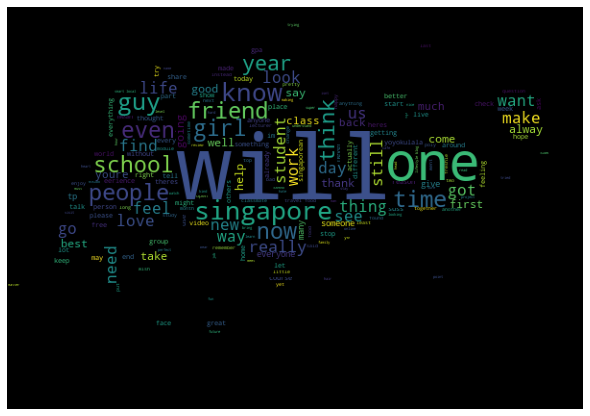

In [17]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 